# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df = pd.read_csv('/content/drive/MyDrive/Bavarage Sales/synthetic_beverage_sales_data.csv')
df = df.sample(frac=0.3, random_state=42)  # Gunakan 30% data
df = df.reset_index(drop=True)

In [80]:
df.head(30)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
1,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
2,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
3,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
4,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16
5,ORD1905015,CUS7810,B2B,Riesling,Alcoholic Beverages,8.62,47,0.05,384.88,Bayern,2021-02-27
6,ORD2638652,CUS4386,B2C,Pepsi,Soft Drinks,1.74,5,0.00,8.70,Niedersachsen,2023-08-13
7,ORD803183,CUS7916,B2C,Hohes C Orange,Juices,1.80,15,0.00,27.00,Saarland,2022-10-06
8,ORD1747192,CUS7549,B2B,Havana Club,Alcoholic Beverages,30.22,57,0.10,1550.29,Bayern,2023-03-16
9,ORD1669739,CUS3794,B2B,Vio Wasser,Water,0.98,6,0.05,5.59,Niedersachsen,2021-09-20


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699973 entries, 0 to 2699972
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 226.6+ MB


In [82]:
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,2.699973e+06,2.699973e+06,2.699973e+06,2.699973e+06
mean,5.831364e+00,2.314647e+01,2.971772e-02,1.310295e+02
std,1.471158e+01,2.690424e+01,4.480022e-02,5.098894e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.968000e+01
max,1.667200e+02,1.000000e+02,1.500000e-01,1.402909e+04


In [83]:
df.isna().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df['Unit_Price'].value_counts()

,count
Unit_Price,
0.99,39500
0.96,39168
0.93,39116
3.12,33244
3.31,33242
...,...
125.32,1
97.18,1
129.96,1


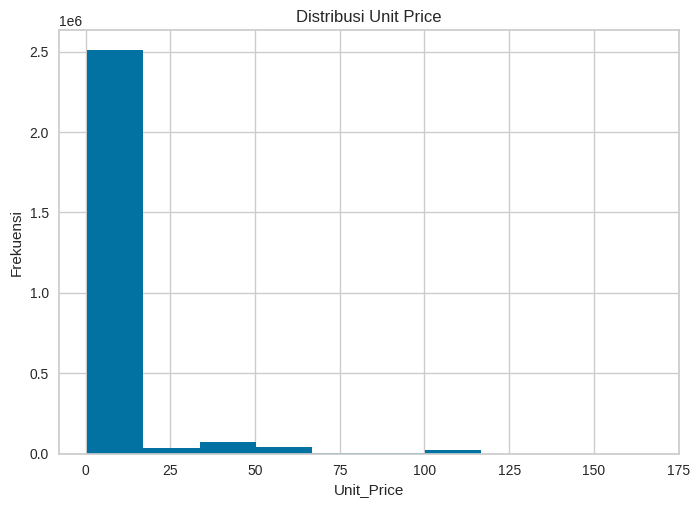

In [86]:

plt.hist(df['Unit_Price'], bins=10)
plt.xlabel('Unit_Price')
plt.ylabel('Frekuensi')
plt.title('Distribusi Unit Price')
plt.show()

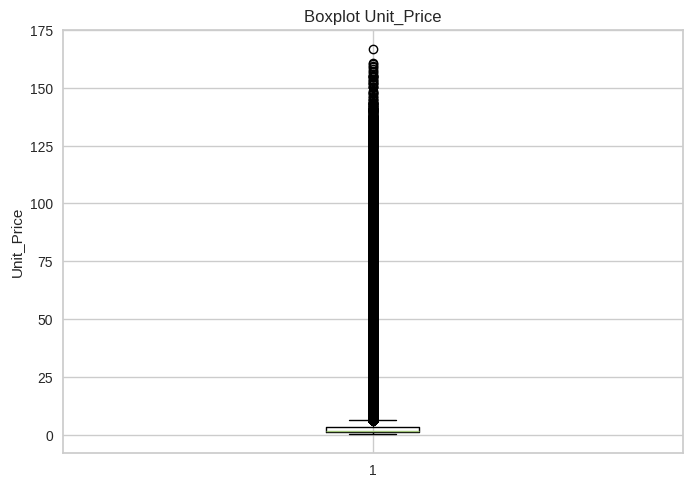

In [87]:
plt.boxplot(df['Unit_Price'])
plt.ylabel('Unit_Price')
plt.title('Boxplot Unit_Price')
plt.show()

In [88]:
df['Total_Price'].value_counts()

,count
Total_Price,
12.48,6288
13.86,5630
6.72,4992
3.72,4975
7.44,4729
...,...
572.94,1
518.61,1
3143.09,1


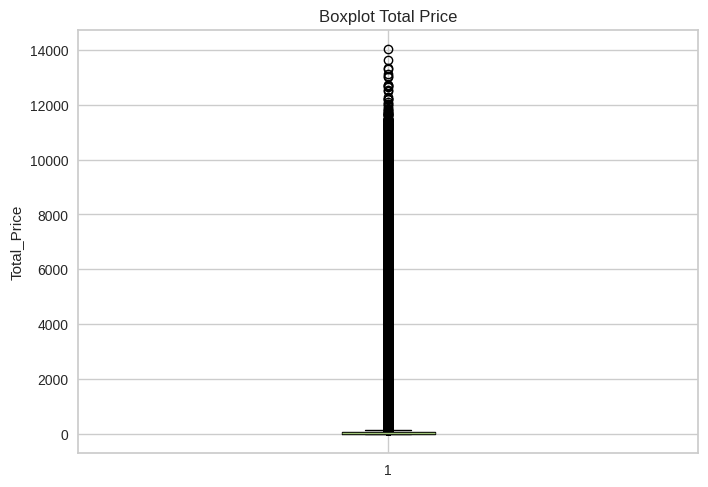

In [89]:
plt.boxplot(df['Total_Price'])
plt.ylabel('Total_Price')
plt.title('Boxplot Total Price')
plt.show()

In [90]:
df['Customer_Type'].value_counts()

,count
Customer_Type,
B2C,1739236
B2B,960737


In [91]:
df['Category'].value_counts()

,count
Category,
Alcoholic Beverages,676914
Soft Drinks,675387
Water,674308
Juices,673364


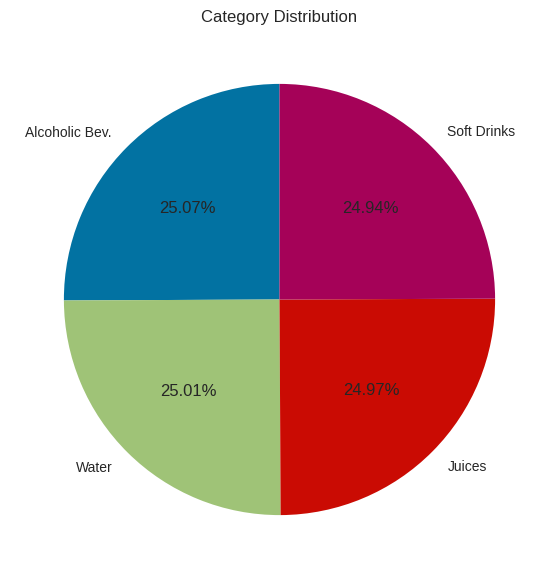

In [92]:
# Menghitung distribusi Category dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(7, 7))
plt.pie(df['Category'].value_counts(), labels=['Alcoholic Bev.', 'Water', 'Juices', 'Soft Drinks'], autopct='%1.2f%%', startangle=90)
plt.title('Category Distribution')
plt.show()

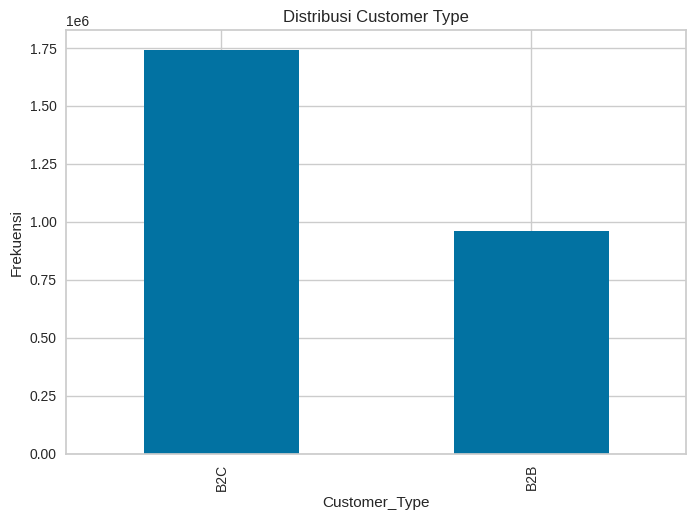

In [93]:
df['Customer_Type'].value_counts().plot(kind='bar')
plt.xlabel('Customer_Type')
plt.ylabel('Frekuensi')
plt.title('Distribusi Customer Type')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [94]:
# Membuat salinan dataset untuk preprocessing
df_processed = df.copy()

In [95]:
# Pisahkan fitur numerik dan kategorikal
numeric_features = ['Unit_Price', 'Total_Price', 'Quantity', 'Discount']
categorical_features = ['Category']

In [96]:
# Buat pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [97]:
# Terapkan preprocessing
X_processed = preprocessor.fit_transform(df_processed)

In [119]:
# Konversi ke DataFrame. nama fitur hasil one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat']
encoded_features = []
for i, feature in enumerate(categorical_features):
    encoded_features.extend([f"{feature}_{cat}" for cat in cat_encoder.categories_[i][1:]])

In [99]:
# Gabungkan nama fitur numerik dan kategorikal
feature_names = numeric_features + encoded_features

In [100]:
# Buat DataFrame dengan nama fitur
df_scaled = pd.DataFrame(X_processed, columns=feature_names)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

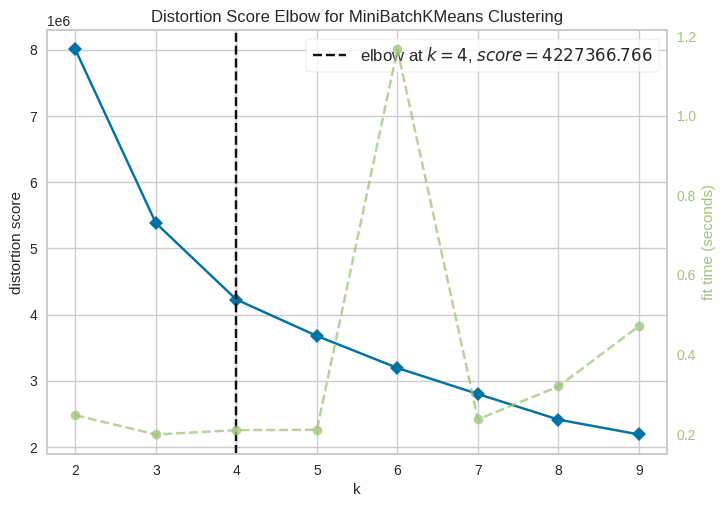

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [101]:
# Menentukan jumlah cluster optimal dengan Elbow Method
model = MiniBatchKMeans(random_state=42, n_init=10, batch_size=1024)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df_scaled)
visualizer.show()

In [118]:
# Berdasarkan elbow method, tentukan jumlah cluster optimal
optimal_k = 4

In [103]:
# Melatih model KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [104]:
# Gunakan random sample karena data terlalu besar
from sklearn.utils import resample
# Sample 1000 poin
if len(df_scaled) > 1000:
    sample_indices = resample(range(len(df_scaled)), n_samples=1000, random_state=42)
    sample_score = silhouette_score(df_scaled.iloc[sample_indices],
                                    clusters[sample_indices])
    print(f'Silhouette Score (on sample): {sample_score}')
else:
    score = silhouette_score(df_scaled, clusters)
    print(f'Silhouette Score: {score}')

Silhouette Score (on sample): 0.5425398519466639


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [105]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [106]:
# Visualisasi hasil clustering menggunakan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

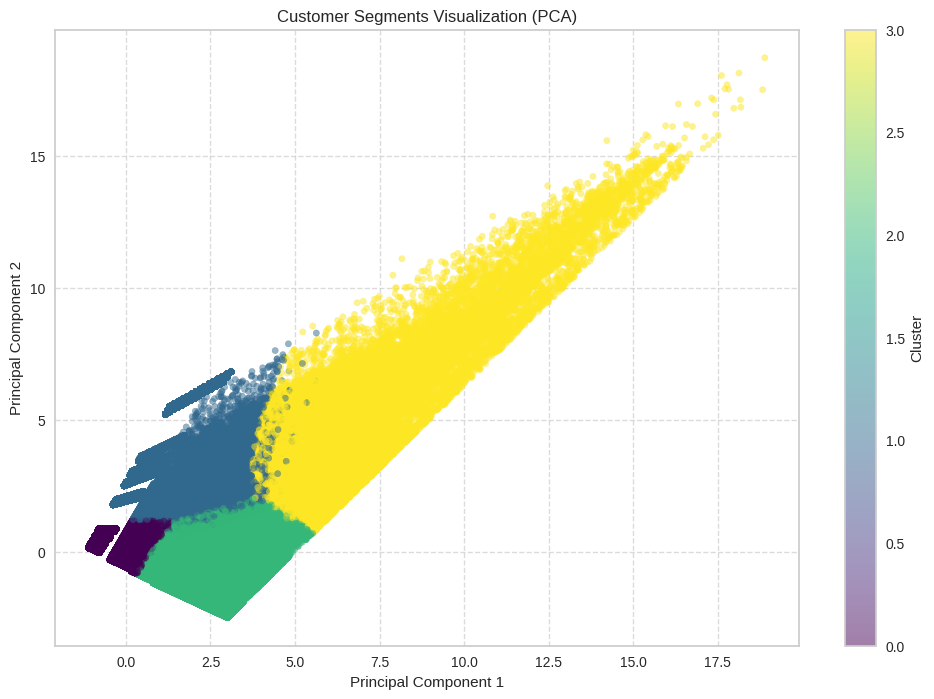

In [107]:
# Plot hasil clustering dengan PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', s=20, alpha=0.5)
plt.title('Customer Segments Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [108]:
# Gabungkan cluster ke dataset asli
df_processed['Cluster'] = clusters

In [109]:
# 1. Analisis fitur numerik
numeric_summary = df_processed.groupby('Cluster')[['Unit_Price', 'Total_Price', 'Quantity', 'Discount']].mean()
print("Rata-rata Fitur Numerik per Cluster:")
print(numeric_summary)

Rata-rata Fitur Numerik per Cluster:
         Unit_Price  Total_Price   Quantity  Discount
Cluster                                              
0          2.385291    21.673389   9.269887  0.007157
1         55.267903   565.629620  11.544113  0.010566
2          3.026916   170.637518  63.218074  0.095724
3         58.868462  3979.019044  77.086796  0.101118


In [110]:
# 2. Analisis fitur kategorikal
print("\nDistribusi Kategorikal per Cluster:")
for feature in categorical_features:
    cross_tab = pd.crosstab(df_processed['Cluster'], df_processed[feature], normalize='index') * 100
    print(f"\n{feature} (%):")
    print(cross_tab.round(2))


Distribusi Kategorikal per Cluster:

Category (%):
Category  Alcoholic Beverages  Juices  Soft Drinks  Water
Cluster                                                  
0                       20.07    26.6        26.69  26.65
1                      100.00     0.0         0.00   0.00
2                       20.46    26.5        26.55  26.49
3                      100.00     0.0         0.00   0.00


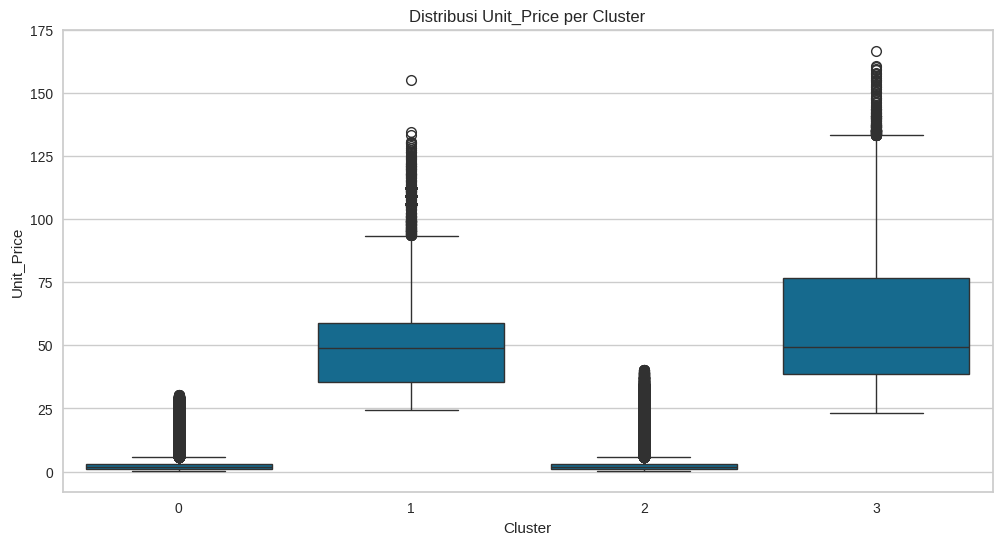

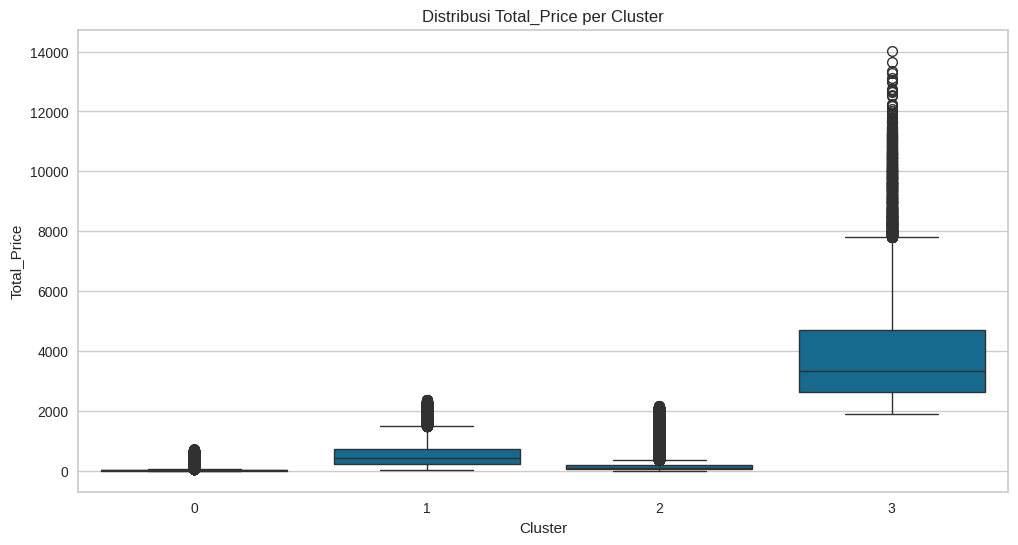

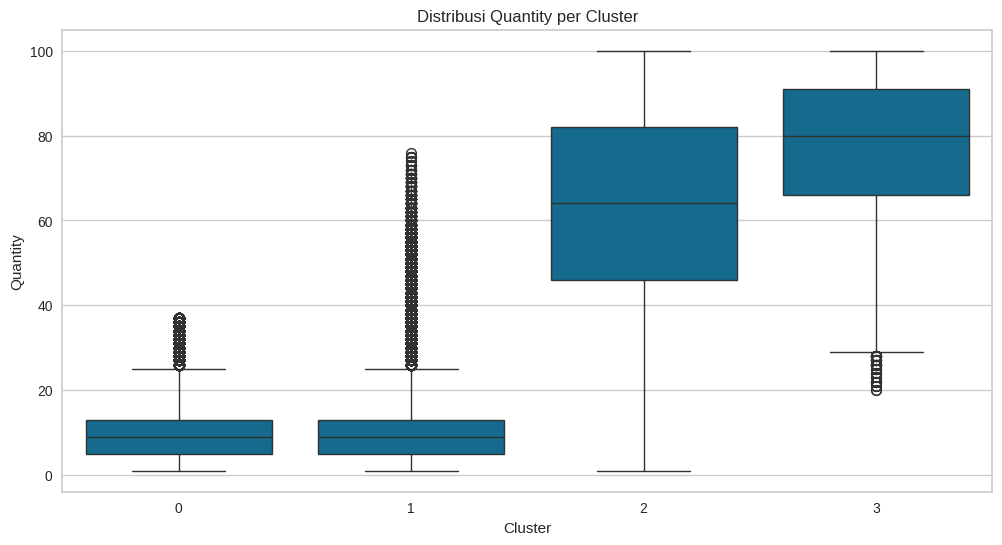

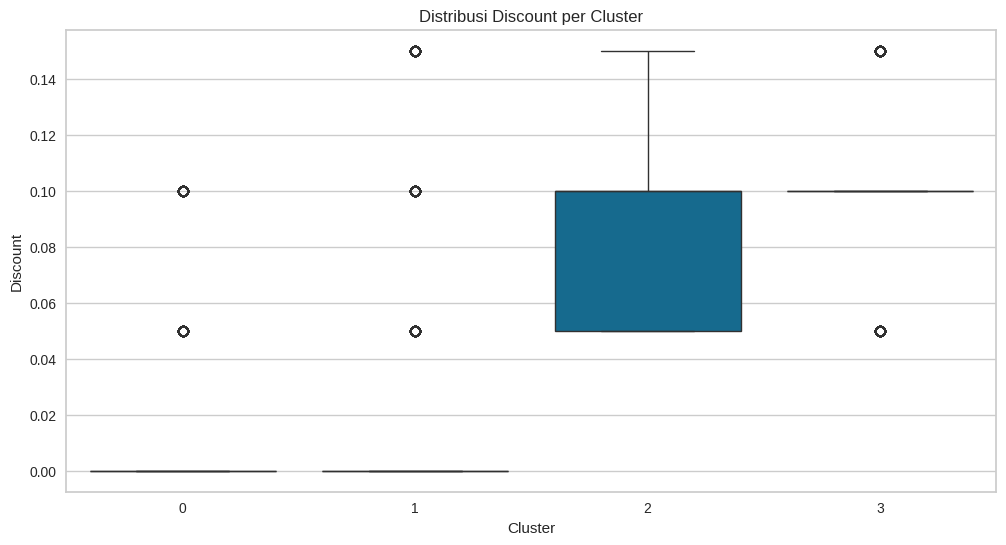

In [111]:
# 3. Visualisasi distribusi numerik per cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Unit_Price', data=df_processed)
plt.title('Distribusi Unit_Price per Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Total_Price', data=df_processed)
plt.title('Distribusi Total_Price per Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Quantity', data=df_processed)
plt.title('Distribusi Quantity per Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Discount', data=df_processed)
plt.title('Distribusi Discount per Cluster')
plt.show()

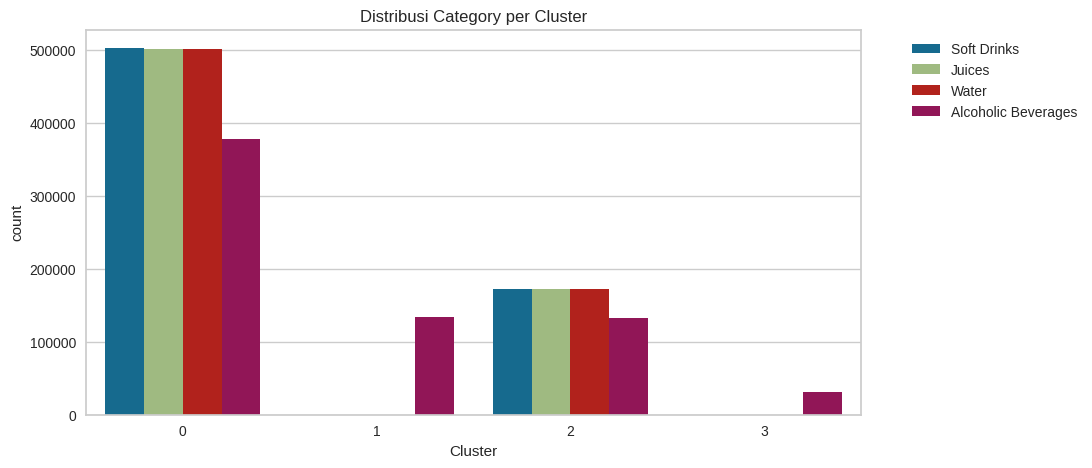

In [112]:
# 4. Visualisasi distribusi kategorikal per cluster
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Cluster', hue=feature, data=df_processed)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [113]:
# Ambil encoder dari ColumnTransformer
encoder = preprocessor.named_transformers_['cat']

# Inverse transform fitur kategorikal (one-hot ke label asli)
df_original_categorical = pd.DataFrame(
    encoder.inverse_transform(df_scaled[encoded_features]),
    columns=categorical_features
)

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [114]:
# Ambil scaler dari ColumnTransformer
scaler = preprocessor.named_transformers_['num']

# Inverse transform fitur numerik
df_original_numeric = pd.DataFrame(
    scaler.inverse_transform(df_scaled[numeric_features]),
    columns=numeric_features
)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [115]:
# Type your code here

# Tulis hasil interpretasinya di sini.
# 1. Cluster 0: Low Spend – Casual Buyers
**Rata-rata Numerik:**
* Unit_Price: 2.39
* Total_Price: 21.67
* Quantity: 9.27
* Discount: 0.007

**Category (%):**

* Alcoholic Beverages: 20.07%
* Juices: 26.6%
* Soft Drinks: 26.69%
* Water: 26.65%

Analisis: Cluster ini terdiri dari pelanggan dengan pengeluaran rendah (low spend) yang membeli berbagai jenis minuman dalam jumlah kecil dengan diskon yang hampir tidak ada. Distribusi kategori yang merata menunjukkan pola konsumsi santai untuk keperluan pribadi atau kebutuhan sehari-hari tanpa preferensi produk tertentu.

# 2. Cluster 1: High Spend – Premium Purchasers
**Rata-rata Numerik:**

* Unit_Price: 55.27
* Total_Price: 565.63
* Quantity: 11.54
* Discount: 0.011

**Category (%):**

Hanya terdiri dari Alcoholic Beverages: 100%.

Analisis: Cluster ini mencakup pelanggan dengan pengeluaran tinggi (high spend) yang hanya membeli minuman beralkohol. Mereka berorientasi pada kualitas, dengan harga satuan yang tinggi dan diskon yang sangat kecil. Pola ini mengindikasikan preferensi terhadap produk premium.

# 3. Cluster 2: Mid Spend – Discount-Oriented
**Rata-rata Numerik:**

* Unit_Price: 3.03
* Total_Price: 170.64
* Quantity: 63.22
* Discount: 0.096

**Category (%):**

* Alcoholic Beverages: 20.46%
* Juices: 26.5%
* Soft Drinks: 26.55%
* Water: 26.49%

Analisis: Cluster ini terdiri dari pelanggan yang membeli berbagai jenis minuman dalam jumlah besar dengan harga satuan rendah. Diskon yang tinggi (0.096) menunjukkan bahwa mereka adalah pelanggan yang sangat sensitif terhadap diskon.

# 4. Cluster 3: High Spend – Distributor Buyers
**Rata-rata Numerik:**

* Unit_Price: 58.87
* Total_Price: 3979.02
* Quantity: 77.09
* Discount: 0.101

**Category (%):**

Hanya terdiri dari Alcoholic Beverages: 100%.

Analisis: Cluster ini adalah pelanggan yang membeli minuman beralkohol dalam jumlah besar, dengan harga satuan sangat tinggi. Diskon yang signifikan (0.101) menunjukkan bahwa mereka kemungkinan besar adalah distributor yang mendapatkan harga khusus untuk volume pembelian besar. Cluster ini mencakup pelanggan dengan pengeluaran sangat tinggi (high spend) yang membeli minuman beralkohol dalam jumlah besar.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [116]:
df_export = pd.concat(
    [df_original_numeric, df_original_categorical, df_processed['Cluster']],
    axis=1
)

In [117]:
df_export.to_csv('/content/drive/MyDrive/Bavarage Sales/clustered_data.csv', index=False)